<a href="https://colab.research.google.com/github/NguyenManhCuong1512/AI/blob/main/linear_regression_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# === BƯỚC 1: ĐỊNH NGHĨA MÔ HÌNH ===
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        # Lớp Linear thực hiện phép toán: y = Wx + b
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        # Hàm forward xác định dữ liệu đi qua mô hình như thế nào
        return self.linear(x)

In [ ]:
# === BƯỚC 2: TẠO DỮ LIỆU ===
# Cố định seed để kết quả sinh ngẫu nhiên luôn giống nhau
torch.manual_seed(42)
# Công thức hồi quy tuyến tính:
X_train = torch.randn(100, 1)
y_train = 4 + 3 * X_train + torch.randn(100, 1) * 0.5
# Dùng để đánh giá mô hình sau khi huấn luyện
X_test = torch.randn(20, 1)
y_test = 4 + 3 * X_test + torch.randn(20, 1) * 0.5

In [ ]:
# === BƯỚC 3: KHỞI TẠO MÔ HÌNH VÀ CÔNG CỤ ===
# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegressionModel(input_dim=1, output_dim=1)
# Hàm mất mát Mean Squared Error (MSE)
criterion = nn.MSELoss()
# Bộ tối ưu Adam
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# === BƯỚC 4: HUẤN LUYỆN MÔ HÌNH ===
num_epochs = 1000
losses = []

for epoch in range(num_epochs):
    # ---- Forward pass ----
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

    # ---- Backward pass & tối ưu ----
    optimizer.zero_grad()   # Reset gradient
    loss.backward()         # Tính gradient
    optimizer.step()        # Cập nhật trọng số

    # In thông tin mỗi 100 epoch
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [100/1000], Loss: 14.0135
Epoch [200/1000], Loss: 6.8761
Epoch [300/1000], Loss: 3.0867
Epoch [400/1000], Loss: 1.3083
Epoch [500/1000], Loss: 0.5762
Epoch [600/1000], Loss: 0.3115
Epoch [700/1000], Loss: 0.2270
Epoch [800/1000], Loss: 0.2029
Epoch [900/1000], Loss: 0.1968
Epoch [1000/1000], Loss: 0.1954


In [ ]:
# === BƯỚC 5: ĐÁNH GIÁ MÔ HÌNH ===
model.eval()  # Chuyển mô hình sang chế độ evaluation

with torch.no_grad():  # Tắt tính gradient để tiết kiệm bộ nhớ
    y_pred_test = model(X_test)
    test_loss = criterion(y_pred_test, y_test)

# ---- TÍNH R² SCORE ----
ss_res = torch.sum((y_test - y_pred_test) ** 2)
ss_tot = torch.sum((y_test - torch.mean(y_test)) ** 2)
r2_score = 1 - ss_res / ss_tot

print("\n=== KẾT QUẢ ===")
print(f"Test Loss (MSE): {test_loss.item():.4f}")
print(f"R² Score: {r2_score.item():.4f}")
print(f"Learned W: {model.linear.weight.item():.4f}")
print(f"Learned b: {model.linear.bias.item():.4f}")


=== KẾT QUẢ ===
Test Loss (MSE): 0.1437
R² Score: 0.9751
Learned W: 2.9874
Learned b: 4.0183


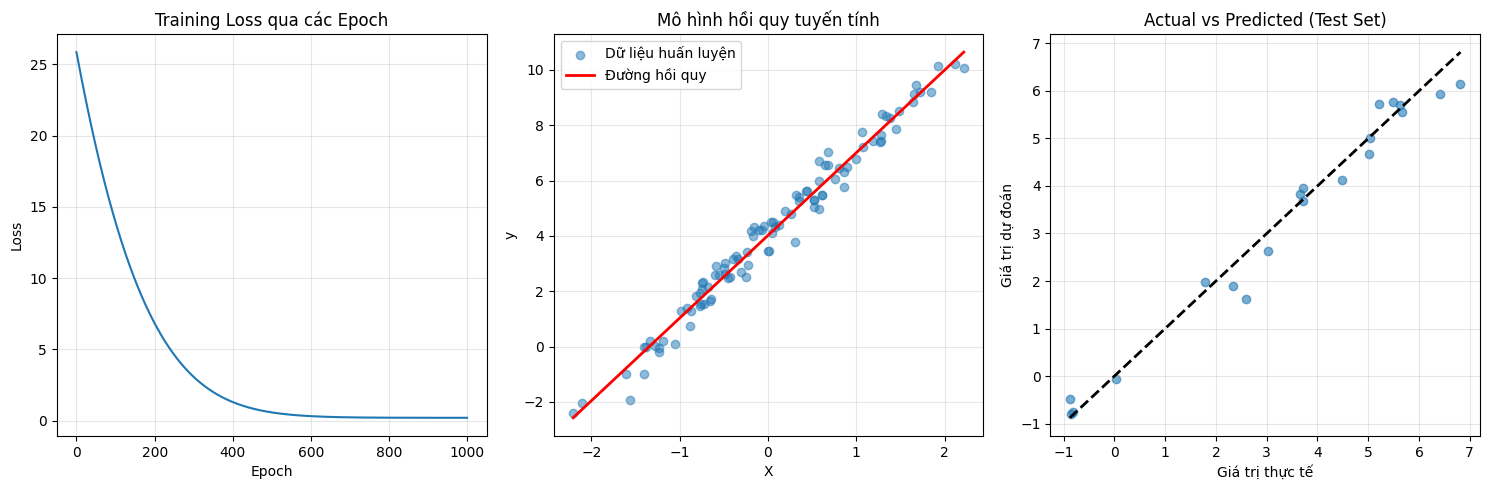

In [ ]:
# === BƯỚC 6: TRỰC QUAN HÓA ===
plt.figure(figsize=(15, 5))

# ---- Subplot 1: Loss curve ----
plt.subplot(1, 3, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss qua các Epoch')
plt.grid(True, alpha=0.3)

# ---- Subplot 2: Training data và đường hồi quy ----
plt.subplot(1, 3, 2)
plt.scatter(X_train.numpy(), y_train.numpy(), alpha=0.5, label='Dữ liệu huấn luyện')

X_range = torch.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
with torch.no_grad():
    y_range = model(X_range)

plt.plot(X_range.numpy(), y_range.numpy(), 'r-', linewidth=2, label='Đường hồi quy')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Mô hình hồi quy tuyến tính')
plt.legend()
plt.grid(True, alpha=0.3)

# ---- Subplot 3: Actual vs Predicted ----
plt.subplot(1, 3, 3)
with torch.no_grad():
    plt.scatter(y_test.numpy(), y_pred_test.numpy(), alpha=0.6)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'k--',
    linewidth=2
)

plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('Actual vs Predicted (Test Set)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()